In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

import requests

# Task 1: Import the dataset

In [115]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"
local_path = "./medical_insurance_dataset.csv"

request = requests.get(url)

if(request.status_code == 200):
    with open(local_path, "wb") as file:
        file.write(request.content)
    print("Success download")
else:
    print(f"Error, status code {request.status_code}")

path = "medical_insurance_dataset.csv"

Success download


<b style="color: orange">Gender:</b>  1 = Female; 2 = Male

<b style="color: orange">B.M.I.</b> = Body Mass Index of the insured

<b style="color: orange">No_of_Children</b> = Number of children the insured person has.

<b style="color: orange">Smoker: </b> 1 = Smoker; 0 = Non smoker

<b style="color: orange">Region: </b> 1 = Northwest; 2 = Northeast; 3 = Southwest; 4 = Southeast

<b style="color: orange">Charges: </b> = Charges of the insurance in USD

In [116]:
df = pd.read_csv(path, header=None)
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [117]:
print(df.applymap(lambda x:x == "?").sum())
df.replace("?", np.nan, inplace=True)   

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64


C:\Users\matia\AppData\Local\Temp\ipykernel_19292\3261922134.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x:x == "?").sum())


# Task 2: Data Wrangling

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.

In [119]:
#Most frequency
is_smoke = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, is_smoke, inplace=True)

#Age mean
mean_age = df['age'].astype(float).mean(axis=0)
df['age'].replace(np.nan, mean_age, inplace=True)

#Update data types
df[['age', 'smoker']] = df[['age', 'smoker']].astype("int")

#
df[['charges']] = np.round(df[['charges']], 2)
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


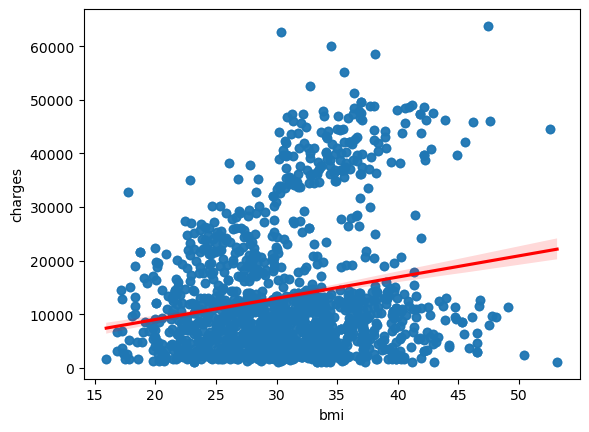

In [120]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color': 'red'})
plt.show()
# plt.ylim(0, )

c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='smoker', ylabel='charges'>

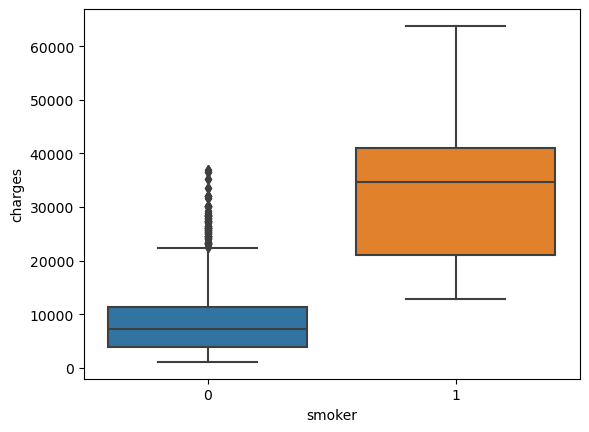

In [121]:
sns.boxplot(x="smoker", y="charges", data=df)

In [122]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.

In [123]:
X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the 
 score of this model. You should see an improvement in the performance.

In [125]:
#Definition of Y and Lm remain same as used in Last cell.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504083820289634


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [126]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452168732325275


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [127]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter 
. Fit the model using training data data subset. Print the 
 score for the testing data.

In [128]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582408


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the 
 score for the testing subset.

In [129]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.783563110760815
